## 1. Reading File

In [71]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#read in file
df = pd.read_csv("../data/stroke_data_raw.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2. Data Exploration

In [73]:
#check for null data
df.info()

#since we have a large amount of data, dropping all rows without a bmi count is favorable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [74]:
#check columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [75]:
#check for unique values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [76]:
#look at aggregated results
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [77]:
print(len(df[df['Residence_type'] == 'Urban'])) #number of urban residents
print(len(df[df['Residence_type'] == 'Rural'])) #rural
print(len(df[df['ever_married'] == 'Yes'])) #number of married individuals
print(len(df[df['ever_married'] == 'No'])) #unmarried

2596
2514
3353
1757


## 3. Cleaning

In [78]:
print(df[(df['stroke'] == 1) & (df['bmi'].isna())].shape[0])
print(df[(df['stroke'] == 0) & (df['bmi'].isna())].shape[0])

#since around 20% of people with no bmi value have reported a stroke, i will keep only those 40 and assign them
#a mean value bmi to substitute

mean_bmi = float(df['bmi'].mean().round(2))
print(mean_bmi)

df.loc[(df['stroke'] == 1) & (df['bmi'].isna()), 'bmi'] = mean_bmi
df

40
161
28.89


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [79]:
#remove all NaN bmi values w/ no indicated stroke
cleaned = df.copy()
cleaned = cleaned[cleaned['bmi'].notna()]
print(cleaned.info())

#note that all plotting in this data is will be done through the df dataframe. 'cleaned' will be a separate dataframe
#that will be manipulated to be easily read by a predictive model.

<class 'pandas.core.frame.DataFrame'>
Index: 4949 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4949 non-null   int64  
 1   gender             4949 non-null   object 
 2   age                4949 non-null   float64
 3   hypertension       4949 non-null   int64  
 4   heart_disease      4949 non-null   int64  
 5   ever_married       4949 non-null   object 
 6   work_type          4949 non-null   object 
 7   Residence_type     4949 non-null   object 
 8   avg_glucose_level  4949 non-null   float64
 9   bmi                4949 non-null   float64
 10  smoking_status     4949 non-null   object 
 11  stroke             4949 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 502.6+ KB
None


In [80]:
print(cleaned['gender'].value_counts())

#since 'Other' has only one entry in the entire dataset, removing it would make it easier for the model to read and not affect the accuracy.
cleaned = cleaned[cleaned['gender'] != 'Other']
cleaned['gender'].value_counts()

gender
Female    2918
Male      2030
Other        1
Name: count, dtype: int64


gender
Female    2918
Male      2030
Name: count, dtype: int64

In [81]:
#rename Residence_type column
cleaned.rename(columns = {'Residence_type' : 'residence_type'}, inplace = True)

#rename 'children' rows
cleaned['work_type'] = cleaned['work_type'].replace('children', 'Children')

#rename 'smoking_status' rows
cleaned['smoking_status'] = cleaned['smoking_status'].replace({
    'formerly smoked' : 'Formerly smoked',
    'never smoked' : 'Never smoked',
    'smokes' : 'Smokes',
    })
cleaned

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,Formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,Never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,Never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,Smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,Never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,Children,Rural,103.08,18.60,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,Never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,Never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,Formerly smoked,0


In [82]:
#replace columns responses with binary data for easier readability by the model
cleaned = cleaned.replace({
    'gender': {'Male': 0, 'Female': 1},
    'ever_married': {'No': 0, 'Yes': 1},
})
cleaned

C:\Users\cwang\AppData\Local\Temp\ipykernel_6668\3910452896.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned = cleaned.replace({


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.60,Formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,28.89,Never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.50,Never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.40,Smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.00,Never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,Children,Rural,103.08,18.60,Unknown,0
5106,44873,1,81.0,0,0,1,Self-employed,Urban,125.20,40.00,Never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,Rural,82.99,30.60,Never smoked,0
5108,37544,0,51.0,0,0,1,Private,Rural,166.29,25.60,Formerly smoked,0


In [83]:
#split non-binary categories into individual columns for model to analyze
cleaned = pd.get_dummies(cleaned, columns=['work_type', 'residence_type', 'smoking_status'], drop_first = False)
bool_cols = cleaned.select_dtypes(include=['bool']).columns
cleaned[bool_cols] = cleaned[bool_cols].astype(int)
cleaned

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Children,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Formerly smoked,smoking_status_Never smoked,smoking_status_Smokes,smoking_status_Unknown
0,9046,0,67.0,0,1,1,228.69,36.60,1,0,0,0,1,0,0,1,1,0,0,0
1,51676,1,61.0,0,0,1,202.21,28.89,1,0,0,0,0,1,1,0,0,1,0,0
2,31112,0,80.0,0,1,1,105.92,32.50,1,0,0,0,1,0,1,0,0,1,0,0
3,60182,1,49.0,0,0,1,171.23,34.40,1,0,0,0,1,0,0,1,0,0,1,0
4,1665,1,79.0,1,0,1,174.12,24.00,1,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,103.08,18.60,0,1,0,0,0,0,1,0,0,0,0,1
5106,44873,1,81.0,0,0,1,125.20,40.00,0,0,0,0,0,1,0,1,0,1,0,0
5107,19723,1,35.0,0,0,1,82.99,30.60,0,0,0,0,0,1,1,0,0,1,0,0
5108,37544,0,51.0,0,0,1,166.29,25.60,0,0,0,0,1,0,1,0,1,0,0,0


In [84]:
#dropping id column since it is not directly being used
cleaned.drop(columns = 'id', inplace = True)

In [85]:
#reset indexes, cleaning done
cleaned.reset_index()

,index,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Children,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,residence_type_Rural,residence_type_Urban,smoking_status_Formerly smoked,smoking_status_Never smoked,smoking_status_Smokes,smoking_status_Unknown
0,0,0,67.0,0,1,1,228.69,36.60,1,0,0,0,1,0,0,1,1,0,0,0
1,1,1,61.0,0,0,1,202.21,28.89,1,0,0,0,0,1,1,0,0,1,0,0
2,2,0,80.0,0,1,1,105.92,32.50,1,0,0,0,1,0,1,0,0,1,0,0
3,3,1,49.0,0,0,1,171.23,34.40,1,0,0,0,1,0,0,1,0,0,1,0
4,4,1,79.0,1,0,1,174.12,24.00,1,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,5104,1,13.0,0,0,0,103.08,18.60,0,1,0,0,0,0,1,0,0,0,0,1
4944,5106,1,81.0,0,0,1,125.20,40.00,0,0,0,0,0,1,0,1,0,1,0,0
4945,5107,1,35.0,0,0,1,82.99,30.60,0,0,0,0,0,1,1,0,0,1,0,0
4946,5108,0,51.0,0,0,1,166.29,25.60,0,0,0,0,1,0,1,0,1,0,0,0


In [86]:
#checking sums of each job category
print(cleaned['work_type_Govt_job'].sum())
print(cleaned['work_type_Never_worked'].sum())
print(cleaned['work_type_Private'].sum())
print(cleaned['work_type_Self-employed'].sum())
print(cleaned['work_type_Children'].sum())

635
22
2832
787
672


## 4. Visualization

In [87]:
#style
plt.style.use('ggplot')

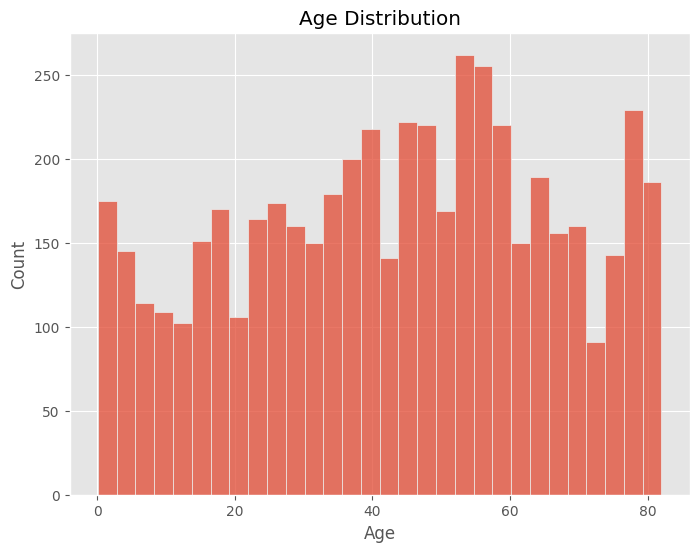

In [88]:
#visualize age distribution
plt.figure(figsize = (8,6))
sns.histplot(df['age'], bins = 30)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#our data contains a diverse amount of data from all age groups.

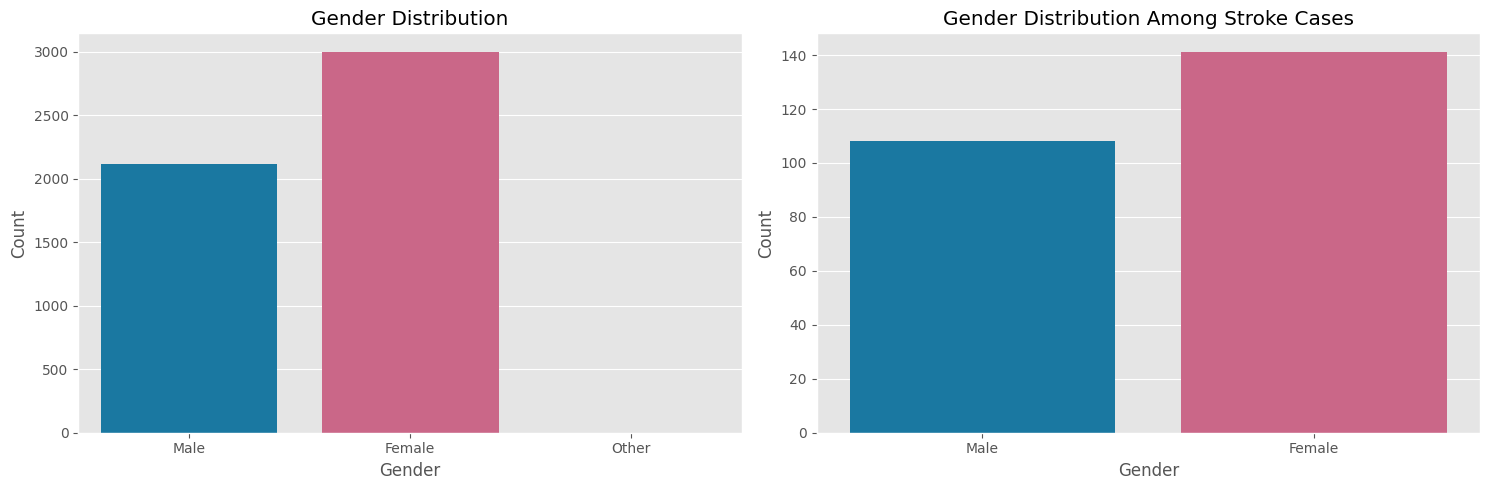

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#female to male ratio
sns.countplot(data = df, x = 'gender', hue = 'gender', palette = {'Male': "#0381B8", 'Female': "#DA5783", 'Other': '#9e9ac8'}, ax = axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

stroke_df = df[df['stroke'] == 1] # collect only people who have reported a stroke
sns.countplot(data = stroke_df, x = 'gender', hue = 'gender', palette = {'Male': "#0381B8", 'Female': "#DA5783", 'Other': '#9e9ac8'}, ax = axes[1])
axes[1].set_title('Gender Distribution Among Stroke Cases')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#female dominated dataset. the majority of reported strokes are female as well.

In [90]:
#stroke amount
print(df['stroke'].value_counts())
print()
#count per job
print(df['work_type'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


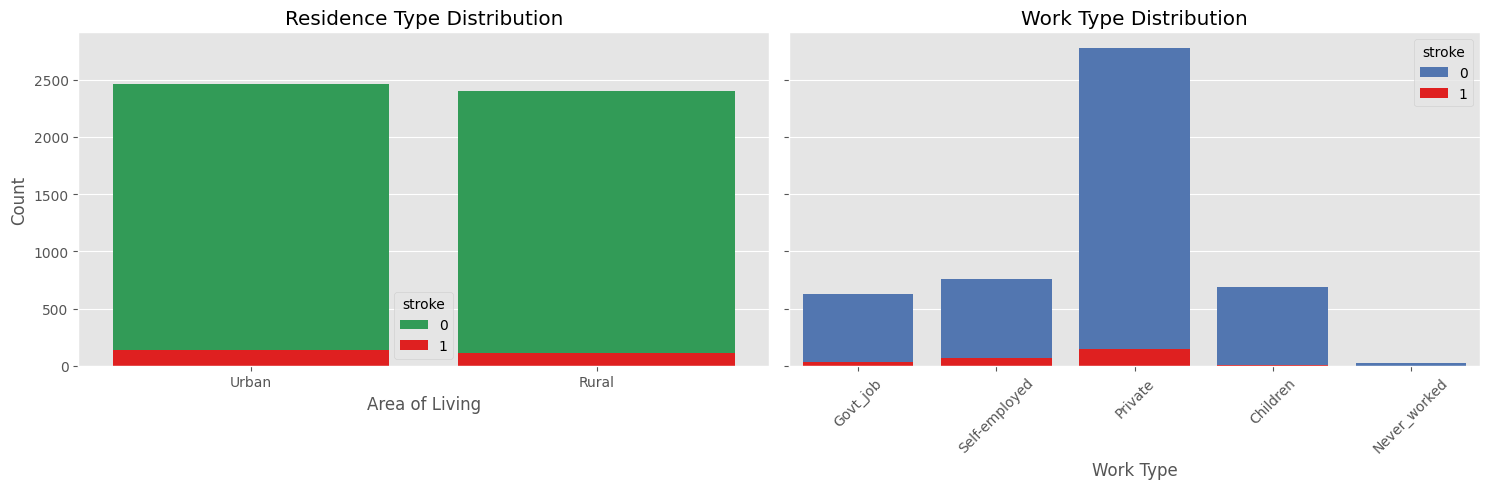

In [91]:
#residence type distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey = True)

sns.countplot(x = 'Residence_type', data = df, ax = axes[0], hue = 'stroke', palette = {0: "#21AC52", 1 : 'red'}, dodge = False)
axes[0].set_title('Residence Type Distribution')
axes[0].set_xlabel('Area of Living')
axes[0].set_ylabel('Count')
axes[0].set_xticks(['Rural', 'Urban'])

#work type distribution
df['work_type'] = df['work_type'].replace('children', 'Children')
order = ['Govt_job', 'Self-employed', 'Private', 'Children', 'Never_worked']
sns.countplot(x = 'work_type', data =  df, order = order, hue = 'stroke', palette = {0: "#4272C0", 1 : 'red'}, dodge = False)
axes[1].set_title('Work Type Distribution')
axes[1].set_xlabel('Work Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

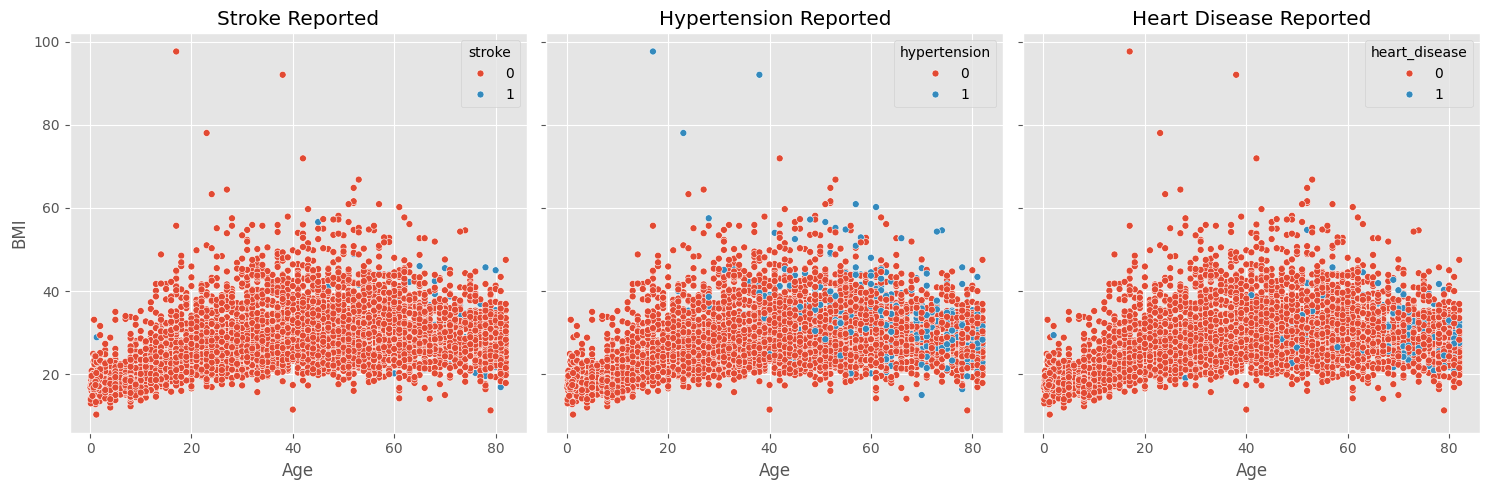

In [92]:
#bmi distribution in relation to reported strokes, hypertension, and heart disease
conditions = [
    ('stroke', 'Stroke Reported'),
    ('hypertension', 'Hypertension Reported'),
    ('heart_disease', 'Heart Disease Reported')
]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex = True, sharey = True)

for ax, (col, title) in zip(axes, conditions):
    sns.scatterplot(data = cleaned, x = 'age', y = 'bmi', hue = col, ax = ax, s = 25)
    ax.set_title(title)
    ax.set_xlabel("Age")
    ax.set_ylabel("BMI")

plt.tight_layout()
plt.show()

#people who have report stroke or conditions leading up to a stroke fall primarily past 40.

## 5. Reporting Correlation

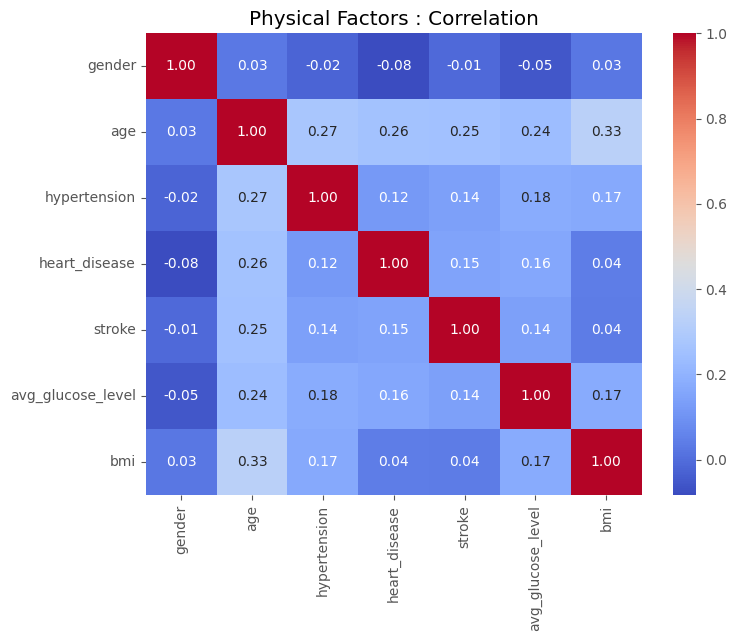

In [93]:
#plot correlations
physical = ['gender', 'age', 'hypertension', 'heart_disease', 'stroke', 'avg_glucose_level', 'bmi']

#physical correlation
plt.figure(figsize = (8, 6))
sns.heatmap(cleaned[physical].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Physical Factors : Correlation')
plt.show()

This heatmap reveals a significant relationship various health conditions being pre-indicators of a stroke. Those that report having heart, blood pressure, or blood sugar issues have a slightly higher chance of getting a stroke. These results are favorable for a predictive model.

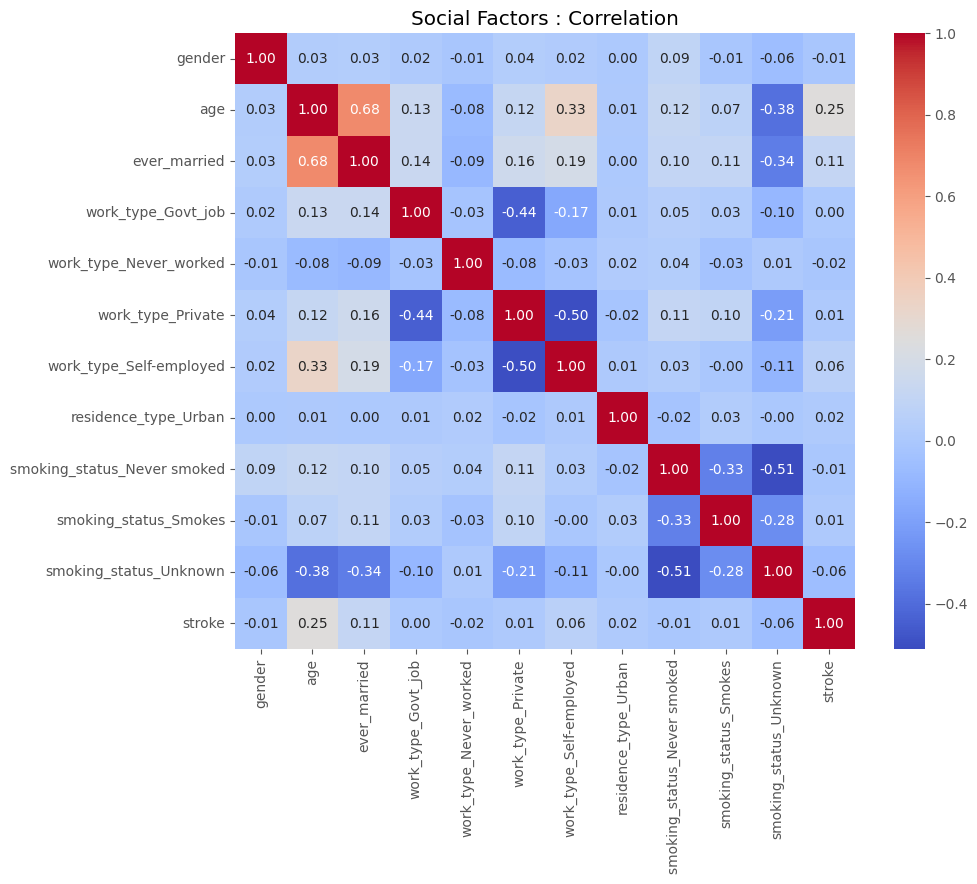

In [94]:
#social correlation
social = ['gender', 'age', 'ever_married',
          'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed',
          'residence_type_Urban',
          'smoking_status_Never smoked', 'smoking_status_Smokes', 'smoking_status_Unknown', 
          'stroke']
#balanced_encoded = pd.get_dummies(balanced[social], drop_first = True, dtype = int)

plt.figure(figsize = (10, 8))
sns.heatmap(cleaned[social].corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Social Factors : Correlation')
plt.show()

Social factors in this dataset don't show a strong correlation to being indicators of strokes. A few reasons this might be the case is because each category is assessed individually. Strokes are often a cause of multiple variables coinciding with one another, not just a single thing.

## 6. Export

In [95]:
cleaned.to_csv('cleaned.csv', index = False)